In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("googleplaystore.csv", parse_dates=["Last Updated"])
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
#df["Installs"]=df["Installs"].str.replace("+","").str.replace(',','')
#df["Installs"]=pd.to_numeric(df["Installs"])

ValueError: Unable to parse string "Free" at position 10472

In [5]:
df.iloc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                                 19
Reviews                                              3.0M
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

In [4]:
df.drop(index=10472,axis=0,inplace=True)

In [5]:
df["Installs"]=df["Installs"].str.replace("+","").str.replace(',','')
df["Installs"]=pd.to_numeric(df["Installs"])

In [6]:
df['Price'] = pd.to_numeric(df['Price'].str.replace('$',''))

In [7]:
df["Reviews"]=pd.to_numeric(df["Reviews"])

In [8]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [11]:
df.describe()

,Rating,Reviews,Installs,Price
count,9366.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.191757,4.441529e+05,1.546434e+07,1.027368
std,0.515219,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.000000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


In [9]:
df.duplicated().sum()

483

In [10]:
df.drop_duplicates(inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          8892 non-null   float64
 3   Reviews         10357 non-null  int64  
 4   Size            10357 non-null  object 
 5   Installs        10357 non-null  int64  
 6   Type            10356 non-null  object 
 7   Price           10357 non-null  float64
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10349 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.1+ MB


In [11]:
df.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [12]:
df.loc[df['Type'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0.0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [13]:
df.drop(index=9148,axis=0,inplace=True)

In [14]:
df.isnull().sum()

App                  0
Category             0
Rating            1464
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [15]:
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
6333,Alumni BJ,SOCIAL,NaN,2,5.4M,100,Free,0.0,Everyone,Social,"November 8, 2017",1,4.1 and up
5587,Sleep as Microsoft Band Add-On,LIFESTYLE,3.5,28,121k,1000,Free,0.0,Everyone,Lifestyle,"January 23, 2016",1.0.0.8,4.2 and up
7650,Chinese Chess / Co Tuong,GAME,4.2,6947,20M,500000,Free,0.0,Everyone,Board,"October 25, 2017",2.7.7,2.3 and up
5576,SleepCloud Backup for Sleep as Android,LIFESTYLE,4.2,2563,Varies with device,100000,Free,0.0,Everyone,Lifestyle,"June 26, 2018",Varies with device,Varies with device
5023,Dashboard AE,AUTO_AND_VEHICLES,NaN,0,13M,10,Free,0.0,Everyone,Auto & Vehicles,"May 16, 2018",1255162018,6.0 and up


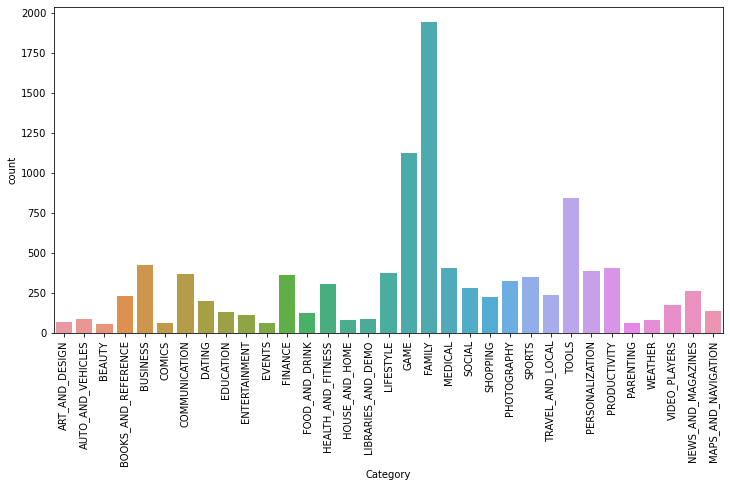

In [20]:
fig_dims = (12, 6)
fig, ax = plt.subplots(figsize=fig_dims)
plt.xticks(rotation=90)
sns.countplot(df['Category'],ax=ax)

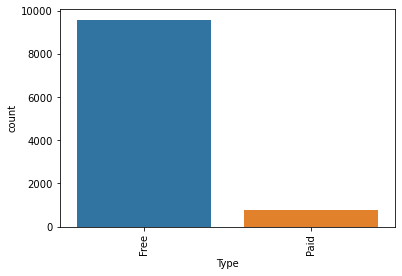

In [21]:
fig_dims = (6, 4)
fig, ax = plt.subplots(figsize=fig_dims)
plt.xticks(rotation=90)
sns.countplot(df['Type'],ax=ax)

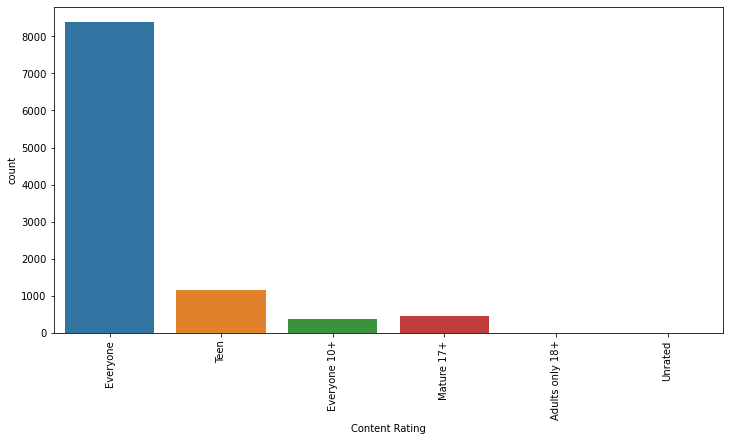

In [22]:
fig_dims = (12, 6)
fig, ax = plt.subplots(figsize=fig_dims)
plt.xticks(rotation=90)
sns.countplot(df['Content Rating'],ax=ax)

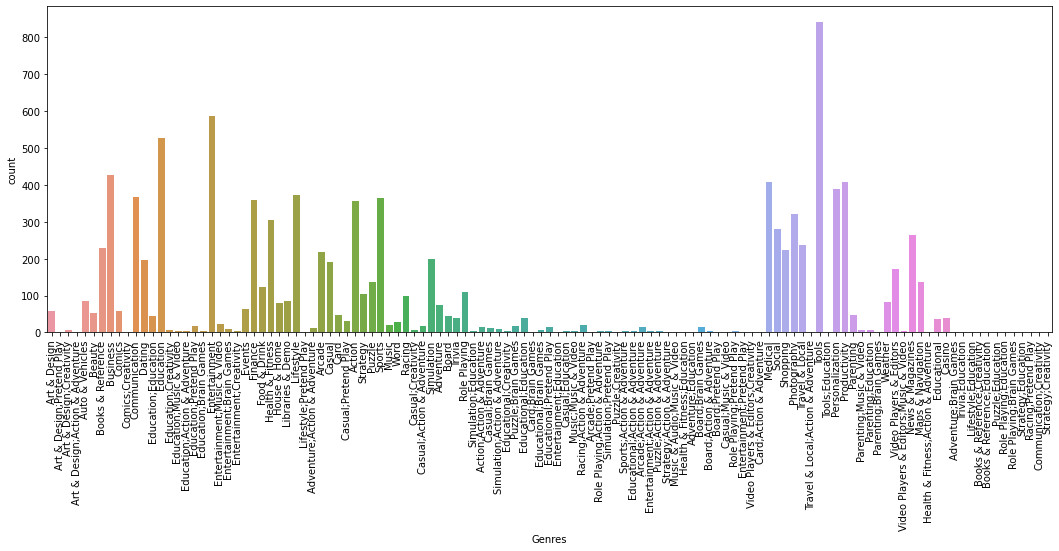

In [23]:
fig_dims = (18, 6)
fig, ax = plt.subplots(figsize=fig_dims)
plt.xticks(rotation=90)
sns.countplot(df['Genres'],ax=ax)

C:\Users\mac\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\mac\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([  17.,   18.,   40.,   73.,  132.,  443.,  850., 1568., 3913.,
        1838.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

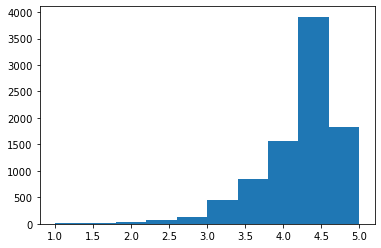

In [24]:
plt.hist(df['Rating'])

(array([1.0245e+04, 7.4000e+01, 1.6000e+01, 8.0000e+00, 0.0000e+00,
        4.0000e+00, 0.0000e+00, 2.0000e+00, 5.0000e+00, 2.0000e+00]),
 array([       0.        ,  7815830.6       , 15631661.2       ,
        23447491.8       , 31263322.4       , 39079153.        ,
        46894983.59999999, 54710814.2       , 62526644.8       ,
        70342475.39999999, 78158306.        ]),
 <a list of 10 Patch objects>)

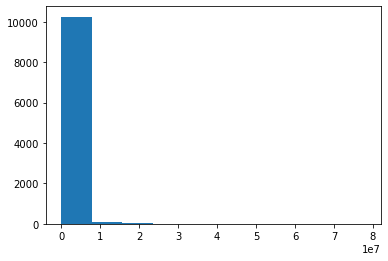

In [25]:
plt.hist(df['Reviews'])

(array([9877.,  369.,    0.,    0.,    0.,   61.,    0.,    0.,    0.,
          49.]),
 array([0.e+00, 1.e+08, 2.e+08, 3.e+08, 4.e+08, 5.e+08, 6.e+08, 7.e+08,
        8.e+08, 9.e+08, 1.e+09]),
 <a list of 10 Patch objects>)

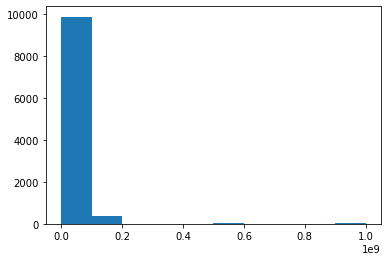

In [26]:
plt.hist(df['Installs'])

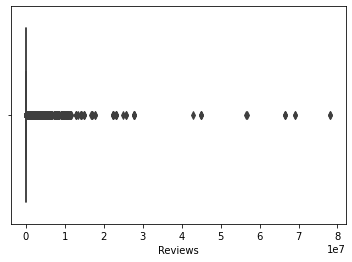

In [28]:
sns.boxplot(df['Reviews'])

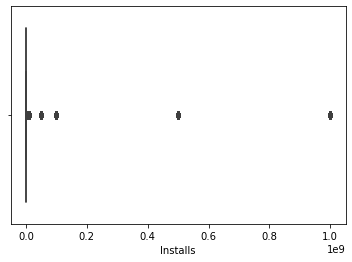

In [29]:
sns.boxplot(df['Installs'])

In [30]:
df['Installs'].skew()

10.1262116913423

In [31]:
df['Reviews'].skew()

17.46650629544988

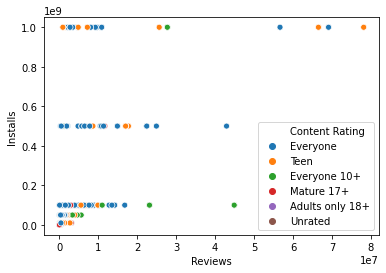

In [36]:
sns.scatterplot(df['Reviews'],df['Installs'],hue=df['Content Rating'])

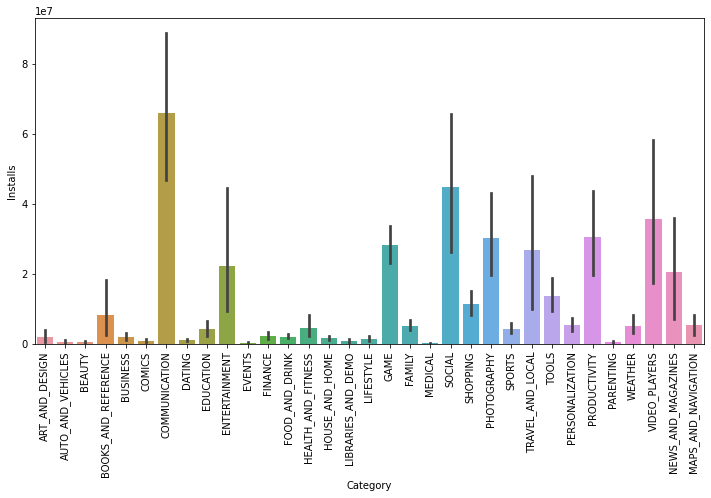

In [37]:
fig_dims = (12, 6)
fig, ax = plt.subplots(figsize=fig_dims)
plt.xticks(rotation=90)
sns.barplot(df['Category'],df['Installs'],ax=ax)

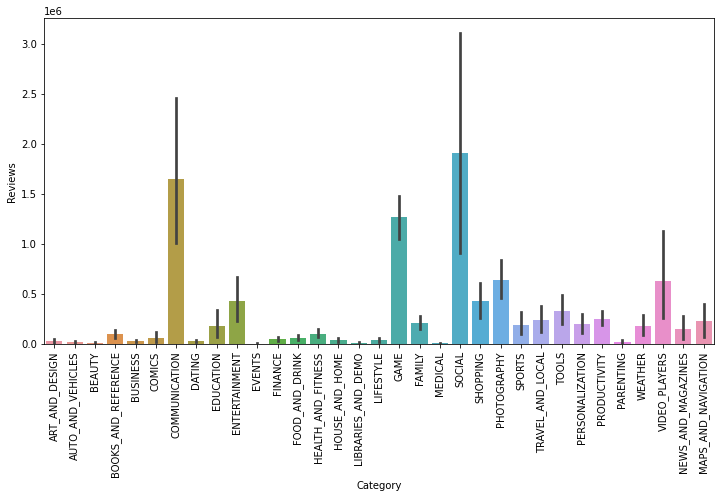

In [38]:
fig_dims = (12, 6)
fig, ax = plt.subplots(figsize=fig_dims)
plt.xticks(rotation=90)
sns.barplot(df['Category'],df['Reviews'],ax=ax)

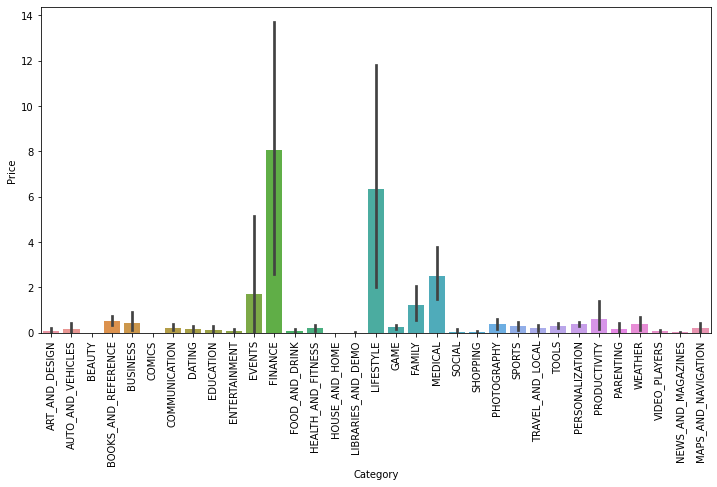

In [39]:
fig_dims = (12, 6)
fig, ax = plt.subplots(figsize=fig_dims)
plt.xticks(rotation=90)
sns.barplot(df['Category'],df['Price'],ax=ax)

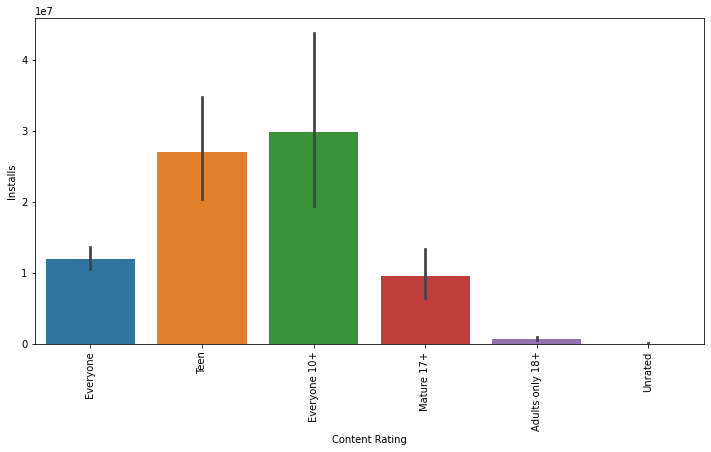

In [45]:
fig_dims = (12, 6)
fig, ax = plt.subplots(figsize=fig_dims)
plt.xticks(rotation=90)
sns.barplot(df['Content Rating'],df['Installs'],ax=ax)

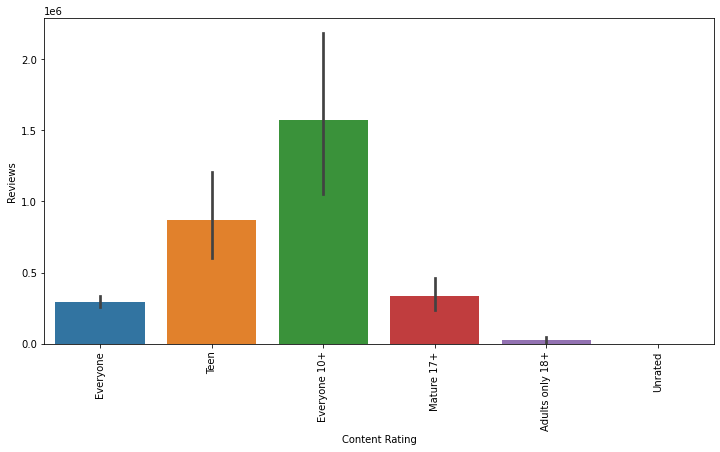

In [42]:
fig_dims = (12, 6)
fig, ax = plt.subplots(figsize=fig_dims)
plt.xticks(rotation=90)
sns.barplot(df['Content Rating'],df['Reviews'],ax=ax)

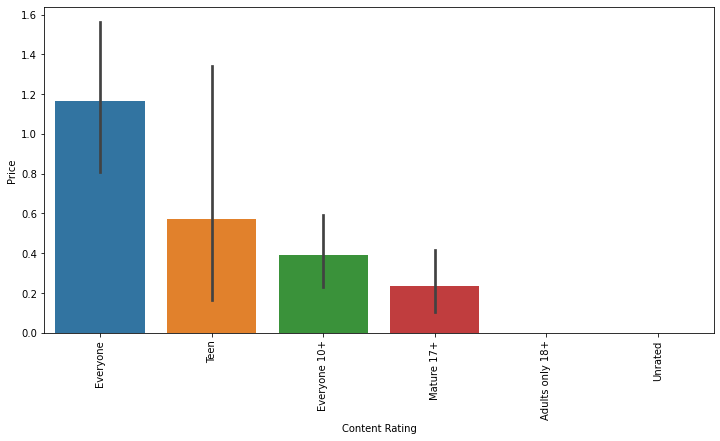

In [43]:
fig_dims = (12, 6)
fig, ax = plt.subplots(figsize=fig_dims)
plt.xticks(rotation=90)
sns.barplot(df['Content Rating'],df['Price'],ax=ax)

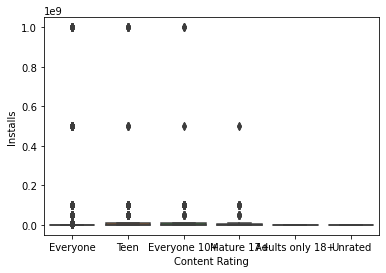

In [46]:
sns.boxplot(df['Content Rating'],df['Installs'])

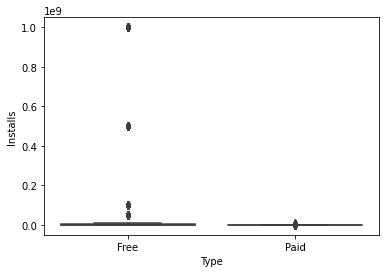

In [48]:
sns.boxplot(df['Type'],df['Installs'])

In [16]:
df["Last Updated"]=df["Last Updated"].str.replace(',','')
df['Last Updated']=df['Last Updated'].astype('datetime64[ns]')

In [17]:
new_df=df.groupby(df['Last Updated'].dt.month).sum().reset_index()

In [18]:
new_df

,Last Updated,Rating,Reviews,Installs,Price
0,1,1645.1,16063878,1152788286,631.33
1,2,1703.1,26426873,1005451455,294.54
2,3,2215.9,26923983,1116318825,1024.28
3,4,2009.3,47481265,2628534919,249.60
4,5,3400.5,145969949,6141108327,1923.67
5,6,4430.2,306444382,6729859574,1301.16
6,7,11180.2,2117529761,66953557819,2223.24
7,8,5800.4,1421660918,57274858529,442.20
8,9,1018.6,8664172,429962325,141.89
9,10,1261.7,17104755,570142024,265.52


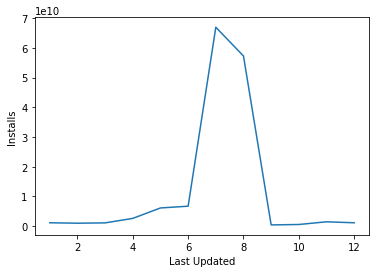

In [72]:
sns.lineplot(new_df['Last Updated'],new_df['Installs'])

In [91]:
df.loc[df['Last Updated'].dt.month==7]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,10000,Free,0.0,Everyone,Art & Design;Creativity,2018-07-03,2.8,4.0.3 and up
11,Name Art Photo Editor - Focus n Filters,ART_AND_DESIGN,4.4,8788,12M,1000000,Free,0.0,Everyone,Art & Design,2018-07-31,1.0.15,4.0 and up
16,Photo Designer - Write your name with shapes,ART_AND_DESIGN,4.7,3632,5.5M,500000,Free,0.0,Everyone,Art & Design,2018-07-31,3.1,4.1 and up
19,ibis Paint X,ART_AND_DESIGN,4.6,224399,31M,10000000,Free,0.0,Everyone,Art & Design,2018-07-30,5.5.4,4.1 and up
22,Superheroes Wallpapers | 4K Backgrounds,ART_AND_DESIGN,4.7,7699,4.2M,500000,Free,0.0,Everyone 10+,Art & Design,2018-07-12,2.2.6.2,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10815,Golden Dictionary (FR-AR),BOOKS_AND_REFERENCE,4.2,5775,4.9M,500000,Free,0.0,Everyone,Books & Reference,2018-07-19,7.0.4.6,4.2 and up
10824,Cardio-FR,MEDICAL,NaN,67,82M,10000,Free,0.0,Everyone,Medical,2018-07-31,2.2.2,4.4 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0.0,Everyone,Education,2018-07-06,1,4.1 and up


In [80]:
df.groupby(df['Last Updated'].dt.month)['Rating','Reviews','Installs','Price'].count()

<ipython-input-80-f0bbf8830a21>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(df['Last Updated'].dt.month)['Rating','Reviews','Installs','Price'].count()


,Rating,Reviews,Installs,Price
Last Updated,,,,
1,397,480,480,480
2,416,527,527,527
3,539,656,656,656
4,484,600,600,600
5,818,962,962,962
6,1060,1225,1225,1225
7,2631,2950,2950,2950
8,1352,1466,1466,1466
9,252,308,308,308


In [92]:
df.loc[df['Last Updated'].dt.month==7]['Installs'].max()

1000000000

In [87]:
df.groupby(df['Last Updated'].dt.month)['Installs'].max()

Last Updated
1      100000000
2      100000000
3      100000000
4      100000000
5      500000000
6      500000000
7     1000000000
8     1000000000
9      100000000
10      50000000
11     100000000
12     100000000
Name: Installs, dtype: int64

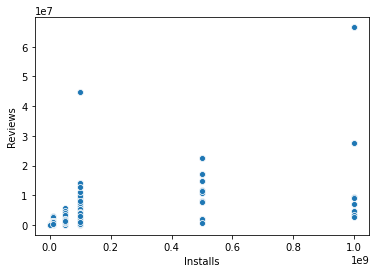

In [93]:
sns.scatterplot(df.loc[df['Last Updated'].dt.month==7]['Installs'],df['Reviews'])

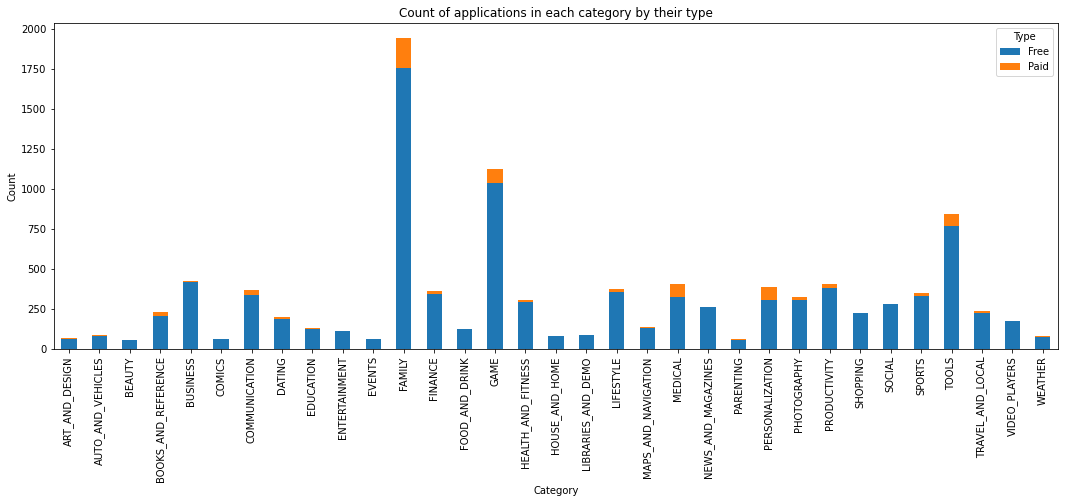

In [94]:
type_count=df.groupby(['Category','Type'])[['App']].count().reset_index().rename(columns={'App':'Count','index':'App'})
df_type_count=type_count.pivot('Category', 'Type', 'Count').fillna(0).reset_index()
df_type_count.set_index('Category').plot(kind='bar', stacked=True, figsize=(18,6))
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Count of applications in each category by their type")
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop(df.columns[[0,3,4,9,10,11,12]],axis=1),df['Reviews'],test_size=0.2)
X_train.shape,X_test.shape

((8284, 6), (2072, 6))

In [20]:
X_train

,Category,Rating,Installs,Type,Price,Content Rating
5580,HEALTH_AND_FITNESS,2.6,10000,Free,0.00,Everyone
6532,FAMILY,1.9,50000,Free,0.00,Everyone
366,COMMUNICATION,4.4,100000000,Free,0.00,Teen
2287,MEDICAL,4.4,50000,Paid,3.99,Everyone
736,EDUCATION,4.7,5000000,Free,0.00,Everyone
...,...,...,...,...,...,...
6332,SHOPPING,4.7,500,Free,0.00,Everyone
9031,LIFESTYLE,4.5,1000,Free,0.00,Everyone
7756,PRODUCTIVITY,5.0,100,Free,0.00,Everyone
3972,TRAVEL_AND_LOCAL,2.2,50000,Free,0.00,Everyone


In [21]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [22]:
from sklearn.compose import ColumnTransformer

In [24]:
transformer=ColumnTransformer(transformers=[('tnf1',SimpleImputer(),['Rating']),
            ('tnf2',OneHotEncoder(sparse=False,drop='first'),['Category','Content Rating']),
            ('tnf3',OrdinalEncoder(categories=[['Free','Paid']]),['Type'])],remainder='passthrough')

In [31]:
new_X_train=transformer.fit_transform(X_train)

In [32]:
new_X_test=transformer.transform(X_test)

In [33]:
new_X_train.shape

(8284, 41)

In [39]:
new_X_test.shape

(2072, 41)

In [44]:
##Without Scaling
from sklearn.tree import DecisionTreeClassifier

In [45]:
clf=DecisionTreeClassifier()

In [46]:
clf.fit(new_X_train,y_train)

DecisionTreeClassifier()

In [52]:
y_pred=clf.predict(new_X_test)
y_pred.shape

(2072,)

In [51]:
y_test.shape

(2072,)

In [53]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.05357142857142857